# Analyzing Bitcoin Historical Data

The objetive of this project is to write a Data Science Blog Post analyzing the historical behaviour of bitcoin price. This Project follows the CRISP-DM process outlined for questions through communication.

**Do not take theis results as advice to take financial decisions. This analysis was created for education purposes only.**

## Questions:

1. How volatile is bitcoin?
2. Were certain months better or worse for Bitcoin?
3. Are Bitcoin and Ethereum prices or volatilities releated ?

### Data Acquisition & Preparation

In [1]:
# import of libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**The dataset was extracted from investing.com**

The datasets were downloaded from www.investing.com and it contains the following features:

 - **Date:**	Daily date of the crypto information
 - **Price:**	USD prices of the crypto currency
 - **Open:**	Opening price of crypto currency (USD)
 - **High:**	Highest price of crypto currency (USD)
 - **Low:** 	Lowest price of crypto currency (USD)
 - **Vol.:**	Volume of crypto traded on the given date
 - **Change%:**	Percentage of the change in crypto currency prices relative to the previous day

In [2]:
bitcoin_hist = pd.read_csv('data/Bitcoin Historical Data.csv')
ethereum_hist = pd.read_csv('data/Ethereum Historical Data.csv')

**The following functions were created based on the open code from Kaggle: https://www.kaggle.com/jkreyner/script-to-clean-data-set**

In [3]:
def data_cleansing(df):
    """
        Clean and process the dataframe of historical prices  
    Args: 
        df: The original dataframe
    Returns: 
        df (DataFrame): post. processed Dataframe
    """
    #change column name
    df = df.rename(columns = {'Change %':'Change','Vol.':'Vol' })
    
    #Replace , on Price, Open, High and Low columns if it is necessary
    try:
        df['Price'] = df.Price.str.replace(',', '').astype(float)
        df['Open'] = df.Open.str.replace(',', '').astype(float)
        df['High'] = df.High.str.replace(',', '').astype(float)
        df['Low'] = df.Low.str.replace(',', '').astype(float)
    except:
        next
    
    #convert Date to datatime and create year, month and day columsn
    if 'Date' in df.columns:
        df.Date = pd.to_datetime(df.Date)
        df[['year','month','day']] = df.Date.apply(lambda x: pd.Series(x.strftime("%Y-%m-%d").split("-")))
        
    #transform data type to float
    df['Vol'] = df['Vol'].apply(to_float)
    
    #delete % from string and transform to float
    df['Change'] = df.Change.str.replace('%', '').astype(float)/100
    
    #columns to lower case
    df.columns = df.columns.str.lower()
    return df

In [4]:

def to_float(x):
    """
        Reformat column to numeric  
    Args: 
        x: Series of Vol to be transformed
    """    
    # transform to numeric base on the string value
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return

In [5]:
#Clean datasets base on the previously created functions
bitcoin_hist = data_cleansing(bitcoin_hist)
ethereum_hist = data_cleansing(ethereum_hist)

### Data Exploration

In [6]:
#Check number of rows and columns
bitcoin_hist.shape

(1734, 10)

In [7]:
#Datafram  types
bitcoin_hist.dtypes

date      datetime64[ns]
price            float64
open             float64
high             float64
low              float64
vol              float64
change           float64
year              object
month             object
day               object
dtype: object

In [8]:
bitcoin_hist.head(5)

,date,price,open,high,low,vol,change,year,month,day
0,2021-09-30,43823.3,41534.5,44101.2,41416.7,64320.0,0.0550,2021,09,30
1,2021-09-29,41536.8,41023.1,42571.2,40815.0,48210.0,0.0125,2021,09,29
2,2021-09-28,41022.3,42169.9,42758.8,40906.4,60010.0,-0.0273,2021,09,28
3,2021-09-27,42172.6,43200.9,44293.2,42143.9,54120.0,-0.0239,2021,09,27
4,2021-09-26,43203.4,42685.8,43907.3,40786.6,69910.0,0.0121,2021,09,26


In [9]:
# Check for Nan values
bitcoin_hist.isna().sum()
#there is no Nan on this dataset

date      0
price     0
open      0
high      0
low       0
vol       0
change    0
year      0
month     0
day       0
dtype: int64

In [10]:
bitcoin_hist.describe()

,price,open,high,low,vol,change
count,1734.000000,1734.000000,1734.000000,1734.000000,1.734000e+03,1734.000000
mean,13338.373241,13313.783391,13714.025144,12866.954037,6.251884e+05,0.003130
std,14503.395570,14488.112468,14939.266433,13964.718994,1.437549e+06,0.042787
min,785.400000,785.400000,826.400000,739.500000,2.600000e+02,-0.391800
25%,5189.100000,5182.300000,5310.675000,5016.025000,1.012550e+05,-0.015400
50%,8234.300000,8225.850000,8448.900000,8037.100000,2.105550e+05,0.002350
75%,11505.925000,11497.650000,11818.850000,11225.725000,6.057675e+05,0.022000
max,63540.900000,63544.200000,64778.000000,62067.500000,2.026000e+07,0.255600


In [11]:
bitcoin_hist["return"] = bitcoin_hist["change"] + 1

## How volatile is bitcoin?

To analyze this question I will take a look at the historical bitcoin prices and its daily changes:

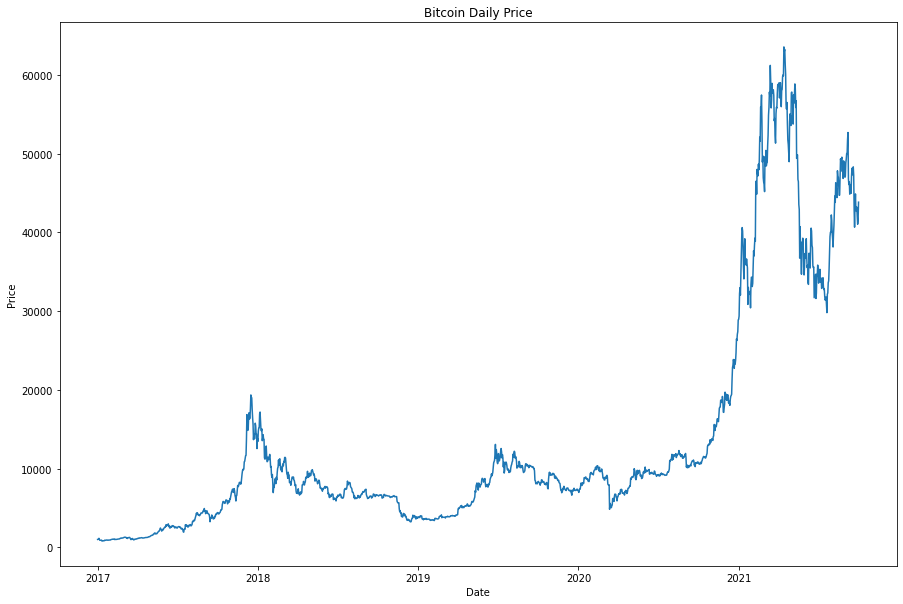

In [12]:
plt.figure(figsize=(15,10))
plt.plot(bitcoin_hist["date"], bitcoin_hist["price"].astype(float))
plt.title("Bitcoin Daily Price")
plt.xlabel("Date")
plt.ylabel("Price");

* Is its clear that Bitcoin has increased its price since 2017, however it has gone through  multiple increases and decreases given this assets a high risk and volatility

We can also explore the distribution of the daily changes in prices

In [29]:
print(bitcoin_hist["change"].min(),bitcoin_hist["change"].max())

-0.3918 0.2556


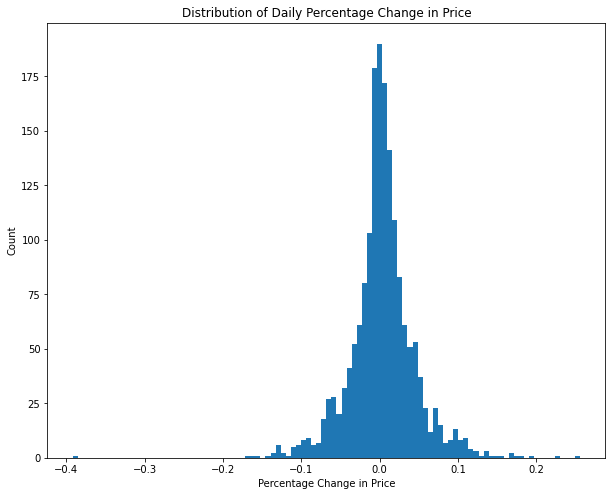

In [13]:
plt.figure(figsize=(10,8))
plt.hist(bitcoin_hist["change"].astype(float), bins = 100)
plt.title("Distribution of Daily Percentage Change in Price")
plt.xlabel("Percentage Change in Price")
plt.ylabel("Count");


* The percentage change in price is prety simetrical around 0.
* There are extreme values on both sizes of the distribution
* Bitcoin has increased its prices cause positive returns are higher than negative returns

## Were certain months better or worse for Bitcoin?

To answer whis question I grouped the product of the returns by month and year and calculated the average through the years

In [16]:
bitcoin_hist_month = bitcoin_hist.groupby(["year","month"])["return"].prod().reset_index()
bitcoin_hist_month["change"] = bitcoin_hist_month["return"] - 1

In [18]:
bitcoin_hist_month.groupby("month")["change"].mean().reset_index()

,month,change
0,01,0.022564
1,02,0.125375
2,03,-0.058936
3,04,0.241960
4,05,0.173026
5,06,0.019927
6,07,0.145769
7,08,0.133171
8,09,-0.083440
9,10,0.206075


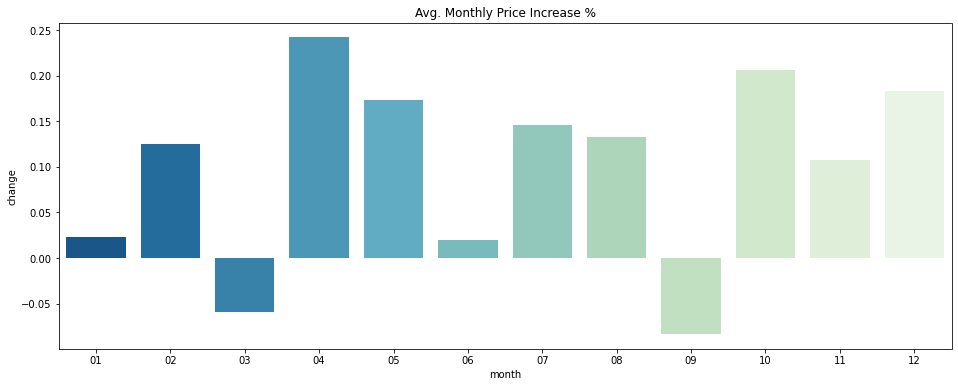

In [19]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="month", y="change", data=bitcoin_hist_month.groupby("month")["change"].mean().reset_index()
                 ,palette="GnBu_r").set_title("Avg. Monthly Price Increase %")

* The worst months for bitcoin have been March and September with negative returns of -5,89% and -8,34%
* The best month for bitcoin has been April with positive returns of 20.60%

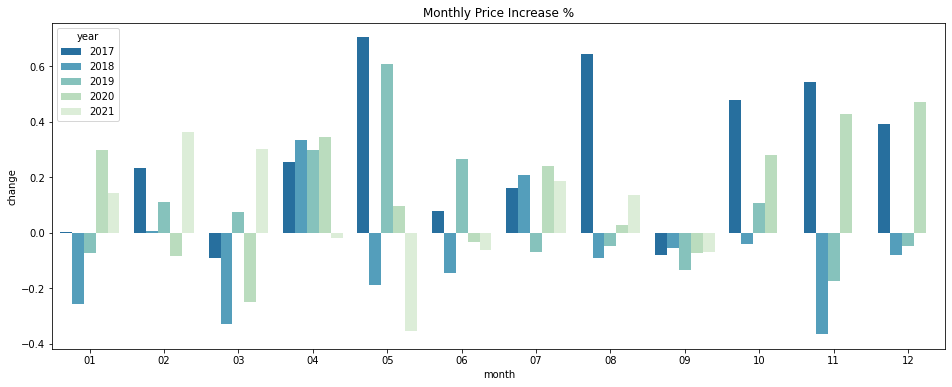

In [17]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="month", y="change", hue="year", data=bitcoin_hist_month,palette="GnBu_r").set_title("Monthly Price Increase %")

* The average percentage change per month is highly influenced but the amazyng returns of bitcoin during years 2017 y 2020.
* September has been a month with negative returns since 2017
* The greater retunr per month was obtained at May 2017 with a return higher than 60%.

## Are Bitcoin and Ethereum prices or volatilities releated ?

Let's calculate the correlations between return and prices of this two assets

In [30]:
#merge both time series for Bitcoin and Ethereum
btc_ada_hist = pd.merge(bitcoin_hist[["price","change","date"]].rename(columns = {'price':'price_btc','change':'change_btc' }),
                       ethereum_hist[["price","change","date"]].rename(columns = {'price':'price_eth','change':'change_eth' }),
                        on = "date", how='inner'
                       )


In [21]:
btc_ada_hist["change_btc"].corr(btc_ada_hist["change_eth"], method='pearson', min_periods=None)

0.8045017369161132

In [22]:
btc_ada_hist["price_btc"].corr(btc_ada_hist["price_eth"], method='pearson', min_periods=None)

0.8997687031901132

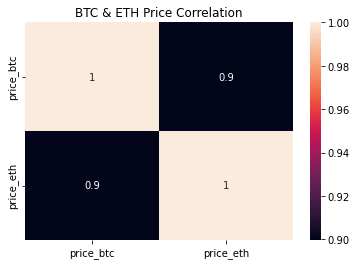

In [23]:
#sns.set(rc={'figure.figsize':(6,5)})
corrMatrix = btc_ada_hist[["price_btc","price_eth"]].corr()
sns.heatmap(corrMatrix, annot=True).set_title("BTC & ETH Price Correlation")
plt.show()

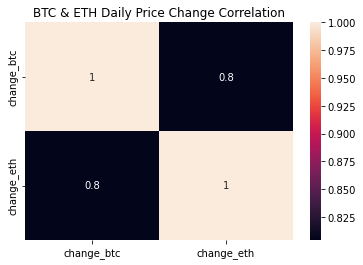

In [24]:
corrMatrix = btc_ada_hist[["change_btc","change_eth"]].corr()
sns.heatmap(corrMatrix, annot=True).set_title("BTC & ETH Daily Price Change Correlation")
plt.show()

* The degree of relationship between Bitcoin and Ethereum prices is high for both prices and returns